<a href="https://colab.research.google.com/github/enochbayode/prediction-loan-approval/blob/main/Copy_of_Predicting_Loan_Approval_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Data/Bluechip

Mounted at /content/drive
/content/drive/MyDrive/Data/Bluechip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("Train.csv")

In [4]:
test_set = pd.read_csv("Test.csv")

In [5]:
dataset.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750


In [6]:
dataset.describe()

,ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000
mean,54964.183452,0.910817,0.854527,0.120210,0.107664,7782.026958,1245.954548,97.410478,359.114954,0.920482,1.183961,0.832994,5239.284503
std,26133.640949,0.285032,0.352607,0.325235,0.309981,9182.571831,2368.012349,103.483478,48.876088,0.270569,0.730568,0.373013,2308.679455
min,10002.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.000000,1963.000000
25%,32337.000000,1.000000,1.000000,0.000000,0.000000,2342.250000,0.000000,17.000000,357.000000,1.000000,1.000000,1.000000,3750.000000
50%,55501.000000,1.000000,1.000000,0.000000,0.000000,6989.000000,117.562275,42.000000,368.000000,1.000000,1.000000,1.000000,6000.000000
75%,77775.750000,1.000000,1.000000,0.000000,0.000000,8375.000000,1680.894542,174.000000,372.000000,1.000000,2.000000,1.000000,6000.000000
max,99998.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,2.000000,1.000000,22500.000000


In [7]:
x = dataset[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
             'LoanAmount', 'Loan_Amount_Term','Credit_History','Property_Area','Total_Income']].values

y = dataset[['Loan_Status']].values

y = np.ravel(y)

In [11]:
# Replace '3+' with 3 in the 'Dependents' column
dataset['Dependents'] = dataset['Dependents'].str.replace('+', '')

# Convert 'Dependents' column to numeric
dataset['Dependents'] = pd.to_numeric(dataset['Dependents'], errors='coerce')

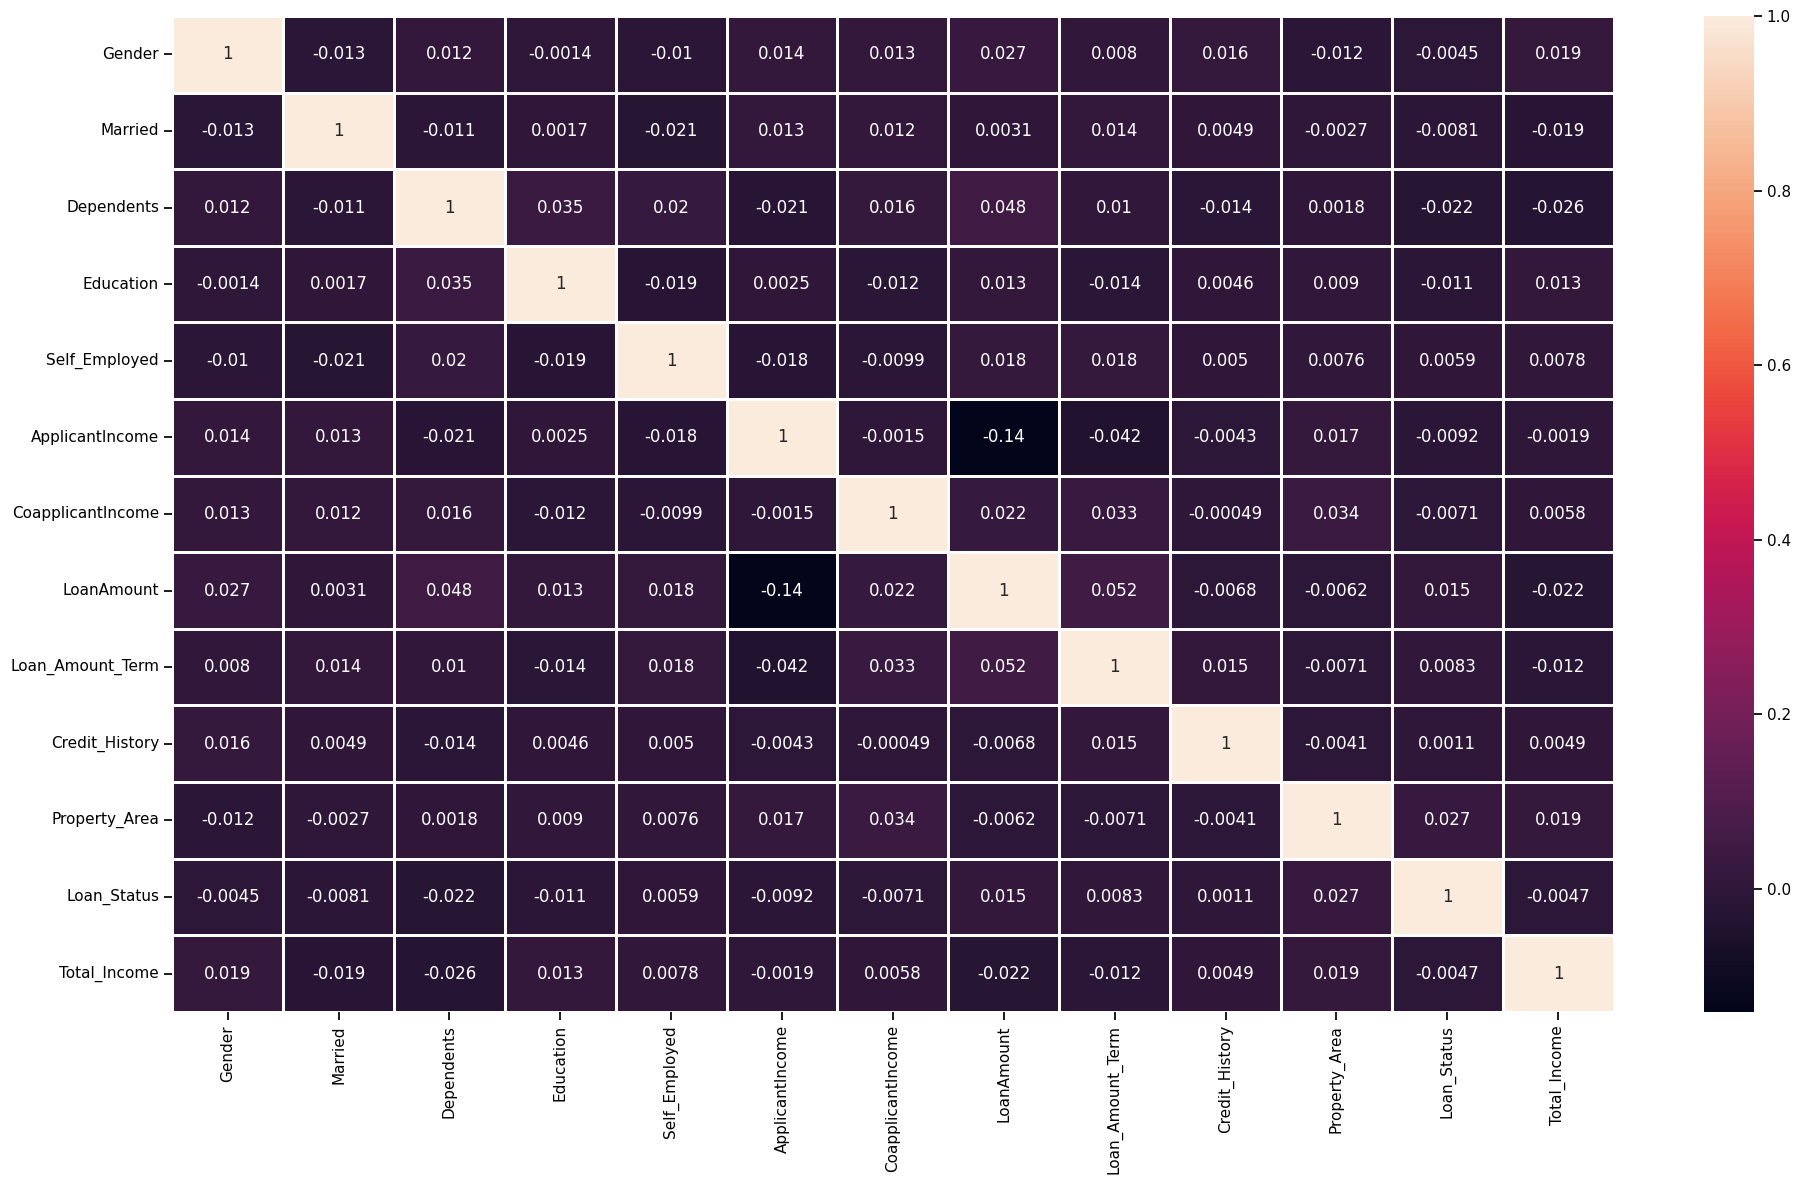

In [12]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.0)
sns.heatmap(dataset.iloc[:, 2:].corr(), annot=True, linewidth =2)
plt.tight_layout()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
# --- Numerical Pipeline ---
num_column = ['ApplicantIncome', 'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term','Total_Income']
num_pipeline = Pipeline([
    ('scaling', RobustScaler())
])

# --- Categorical Pipeline ---
cat_column = ['Dependents', 'Property_Area']
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# --- Combine Both Pipelines into Transformer ---
# Exclude 'Loan_Status' from the ColumnTransformer as it's the target variable
features_columns = [col for col in dataset.columns[2:] if col != 'Loan_Status'] # Get all feature columns excluding 'Loan_Status'
preprocessor = ColumnTransformer([
    ('categorical', cat_pipeline, [col for col in cat_column if col in features_columns]), # Apply cat_pipeline to specified categorical columns
    ('numerical', num_pipeline, [col for col in num_column if col in features_columns]) # Apply num_pipeline to specified numerical columns
], remainder='passthrough')

# --- Apply Transformer to Pipeline ---
process_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# --- Apply to Dataframe ---
# Separate features (X) and target (y) for training and testing
X_train = dataset[features_columns]  # Features for training
y_train = dataset['Loan_Status']     # Target variable for training
X_test = test_set[features_columns]    # Features for testing

train_data = process_pipeline.fit_transform(X_train) # Fit and transform on training features
test_data = process_pipeline.transform(X_test)       # Transform test features

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [21]:
# --- Numerical Pipeline ---
num_column = ['ApplicantIncome', 'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term','Total_Income']
num_pipeline = Pipeline([
    ('scaling', RobustScaler())
])

# --- Categorical Pipeline ---
cat_column = ['Dependents', 'Property_Area']
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)) # handle_unknown='ignore', sparse_output=False
])

# --- Combine Both Pipelines into Transformer ---
# Exclude 'Loan_Status' from the ColumnTransformer as it's the target variable
features_columns = [col for col in dataset.columns[2:] if col != 'Loan_Status'] # Get all feature columns excluding 'Loan_Status'
preprocessor = ColumnTransformer([
    ('categorical', cat_pipeline, [col for col in cat_column if col in features_columns]), # Apply cat_pipeline to specified categorical columns
    ('numerical', num_pipeline, [col for col in num_column if col in features_columns]) # Apply num_pipeline to specified numerical columns
], remainder='passthrough')

# --- Apply Transformer to Pipeline ---
process_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# --- Apply to Dataframe ---
# Separate features (X) and target (y) for training and testing
X_train = dataset[features_columns]  # Features for training
y_train = dataset['Loan_Status']     # Target variable for training
X_test = test_set[features_columns]    # Features for testing

train_data = process_pipeline.fit_transform(X_train) # Fit and transform on training features
test_data = process_pipeline.transform(X_test)       # Transform test features

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(train_data, y)
predictions = model.predict(test_data)

print (predictions)

[1 1 1 ... 1 1 1]
